In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy as np
import requests
import numpy.linalg as la

In [4]:
states_df=pd.DataFrame(pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv"))
disaster_df=pd.DataFrame(pd.read_csv("cleaned_data.csv"))

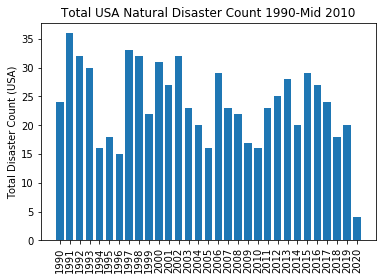

In [11]:
by_year_df=disaster_df.groupby("Year")
by_year_df.head()
by_year_df.count()
states=states_df["usa_state"].tolist()
year_counts=by_year_df.count()["Disaster Subgroup"].tolist()
years_list=disaster_df["Year"].unique().tolist()
plt.bar(range(len(year_counts)),year_counts,width=.75)
tick_locations = [value for value in range(len(year_counts))]
plt.xticks(tick_locations, years_list,rotation=90)
plt.ylabel("Total Disaster Count (USA)")
plt.tick_params(labelsize=10)
plt.title("Total USA Natural Disaster Count 1990-Mid 2010")
plt.savefig("Total USA Natural Disaster Count 1990-Mid 2010.png")

In [8]:
cs_states=df["Location"].tolist()
state_counts=[]
for st in states:
    count=0
    for string in cs_states:
        if str(string).count(st)>0:
            count=count+1
    state_counts.append(count)

In [10]:
states_df["State Counts"]=state_counts
states_df

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,State Counts
0,AK,63.588753,-154.493062,Alaska,7
1,AL,32.318231,-86.902298,Alabama,106
2,AR,35.201050,-91.831833,Arkansas,103
3,AZ,34.048928,-111.093731,Arizona,27
4,CA,36.778261,-119.417932,California,104
5,CO,39.550051,-105.782067,Colorado,70
6,CT,41.603221,-73.087749,Connecticut,47
7,DC,38.905985,-77.033418,District of Columbia,17
8,DE,38.910832,-75.527670,Delaware,34
9,FL,27.664827,-81.515754,Florida,82


In [16]:
fema_df=pd.DataFrame(pd.read_csv("Fema_DisasterDeclarationsSummaries.csv"))
fema_group=fema_df.groupby(["state","Year"])
year_state_counts=[]
stcodes=states_df["usa_state_code"].tolist()
del stcodes[7]
del stcodes[39]
for code in stcodes:
    year_state_counts.append(fema_group.count().loc[code]["disasterNumber"])
for num in range(len(year_state_counts)):
    for ID in year_state_counts[num].index:
        if (ID <1984) or (ID >2010):
            del year_state_counts[num][ID]
for num in range(len(year_state_counts)):
    for year in np.arange(1984,2011):
        try:
            print(year_state_counts[num][year])
        except:
            year_state_counts[num][year]=0
year_state_counts

6
1
3
1
1
3
4
2
14
1
20
3
13
5
11
1
4
10
2
60
12
27
43
17
3
44
19
17
28
31
38
67
141
8
71
47
3
11
37
21
5
6
53
22
22
20
23
28
75
7
121
106
25
2
9
17
5
2
3
4
8
10
7
3
43
15
1
3
24
8
39
3
10
12
4
1
11
33
3
99
4
48
41
10
1
14
23
24
82
57
32
38
11
13
15
1
1
3
1
13
12
4
15
80
4
2
2
4
1
5
1
2
6
8
6
3
3
13
7
5
2
2
1
1
4
1
3
1
19
11
15
28
25
16
197
171
45
35
12
232
122
1
28
119
29
47
15
13
51
119
8
57
1
111
159
22
21
70
1
6
2
3
3
1
1
5
7
4
3
3
1
5
4
56
16
9
114
31
83
38
23
21
77
99
84
85
1
117
10
30
16
46
1
4
2
8
23
8
3
16
1
39
16
19
44
7
1
10
16
4
102
6
11
43
17
11
31
73
21
6
85
13
34
63
67
89
179
3
1
109
37
6
10
57
32
3
1
15
31
151
20
214
123
69
92
28
90
19
4
101
61
3
32
37
76
119
105
122
9
73
26
91
4
14
52
53
36
9
8
12
3
22
23
11
60
38
260
24
3
161
11
13
8
11
1
10
7
1
7
5
26
3
8
9
17
1
1
9
11
15
44
24
3
14
4
9
11
12
1
17
22
7
8
6
7
28
1
18
16
16
7
21
30
7
5
15
1
2
6
26
83
12
10
8
10
57
15
26
133
9
23
72
20
7
87
18
8
6
37
86
11
30
10
137
18
62
22
6
11
79
76
37
115
71
37
200
74
37
4
1
35
72
2

[Year
 1986     6
 1988     1
 1989     3
 1990     1
 1991     1
 1994     3
 1995     4
 1996     2
 2000    14
 2001     1
 2002    20
 2003     3
 2004    13
 2005     5
 2006    11
 2007     1
 2008     4
 2009    10
 1984     0
 1985     0
 1987     0
 1992     0
 1993     0
 1997     0
 1998     0
 1999     0
 2010     0
 Name: disasterNumber, dtype: int64,
 Year
 1985      2
 1990     60
 1991     12
 1994     27
 1995     43
 1996     17
 1997      3
 1998     44
 1999     19
 2000     17
 2001     28
 2002     31
 2003     38
 2004     67
 2005    141
 2007      8
 2008     71
 2009     47
 2010      3
 1984      0
 1986      0
 1987      0
 1988      0
 1989      0
 1992      0
 1993      0
 2006      0
 Name: disasterNumber, dtype: int64,
 Year
 1987     11
 1990     37
 1991     21
 1992      5
 1996      6
 1997     53
 1999     22
 2001     22
 2002     20
 2003     23
 2004     28
 2005     75
 2006      7
 2008    121
 2009    106
 2010     25
 1984      0
 1985      0

In [19]:
temp=pd.DataFrame(data=year_state_counts,index=stcodes)
temp=temp.transpose()
temp.to_csv("disaster_count_by_year&state.csv")

In [20]:
ysl=[]
for num in range(len(year_state_counts)):
    ysl.append(year_state_counts[num].tolist())

In [23]:
eia="5f37c0ee03a8d0b528f90c73b145f8b4"
url="http://api.eia.gov/series/?api_key={0}&series_id=PET.EMA_EPM0_PTC_S{1}_DPG.A"
#test=requests.get(url.format(eia)).json()
gas_years=np.arange(1984,2020).tolist()
#test["series"][0]["data"][10][1]   example of grabing gas price
req_list=[]
for code in states_df["usa_state_code"]:
    req_list.append(requests.get(url.format(eia,code)).json())
del req_list[39]
del req_list[7]

In [26]:
mydict={
    "State":states_df["usa_state"],
    "Price":[],
    "Year":gas_years
}
for num in range(len(req_list)):
    for num1 in range(len(req_list[0]["series"][0]["data"])):
        if req_list[num]["series"][0]["data"][num1][1] is None:
            pass
        else:
            mydict["Price"].append(req_list[num]["series"][0]["data"][num1][1])
len(mydict["Price"])/27
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
test=list(chunks(mydict["Price"],27))
dates=np.arange(1984,2011).tolist()
for num in range(len(test)):
    test[num].reverse()
gas_inf_df=pd.DataFrame(test,index=stcodes,columns=dates)
gas_inf_df=gas_inf_df.transpose()
gas_inf_df.to_csv("gas_price_state_year_inflated.csv")
gas_inf_df

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1984,0.929,0.914,0.893,0.926,0.926,0.907,0.944,0.906,0.921,0.891,...,0.980,0.908,0.919,0.902,0.931,0.980,0.909,0.926,0.950,0.977
1985,1.009,0.934,0.891,0.927,0.906,0.943,0.954,0.929,0.930,0.925,...,0.964,0.903,0.909,0.898,0.946,0.984,0.906,0.926,0.952,0.956
1986,0.982,0.664,0.609,0.681,0.668,0.622,0.707,0.649,0.635,0.642,...,0.668,0.631,0.620,0.628,0.661,0.758,0.650,0.628,0.689,0.700
1987,0.961,0.681,0.661,0.719,0.689,0.688,0.741,0.682,0.703,0.675,...,0.701,0.661,0.666,0.669,0.687,0.775,0.657,0.679,0.716,0.720
1988,0.949,0.675,0.651,0.675,0.708,0.657,0.782,0.695,0.710,0.673,...,0.680,0.670,0.673,0.689,0.710,0.797,0.668,0.661,0.733,0.711
1989,0.978,0.809,0.738,0.771,0.783,0.755,0.859,0.787,0.794,0.754,...,0.837,0.753,0.747,0.761,0.798,0.891,0.748,0.751,0.824,0.842
1990,1.148,0.928,0.874,0.901,0.898,0.874,0.975,0.935,0.921,0.879,...,0.935,0.894,0.897,0.876,0.909,0.991,0.895,0.884,0.935,0.944
1991,1.039,0.826,0.790,0.774,0.740,0.801,0.900,0.856,0.823,0.808,...,0.851,0.787,0.828,0.776,0.809,0.959,0.787,0.815,0.861,0.869
1992,1.112,0.791,0.749,0.834,0.850,0.837,0.856,0.803,0.792,0.766,...,0.829,0.764,0.783,0.795,0.792,0.884,0.820,0.774,0.829,0.895
1993,1.060,0.756,0.731,0.860,0.813,0.826,0.810,0.729,0.771,0.730,...,0.802,0.729,0.745,0.759,0.761,0.831,0.777,0.727,0.792,0.835


In [29]:
cpi_df=pd.DataFrame(pd.read_csv("cpi_by_year.csv"))
annual_cpi=cpi_df["Annual"]
testing=gas_inf_df
#testing.iloc[0]=testing.iloc[0]+1
annual_cpi=annual_cpi.tolist()
for num in range(len(testing["TX"])):
    testing.iloc[num]=(testing.iloc[num]*annual_cpi[26])/annual_cpi[num]
#cpi forumla=todaycpi/yesterdaycpi=today$/yesterday$
#so today cash=todaycpi*yesterday$/yesterdaycpi
testing.to_csv("deflated_gas.csv")

In [30]:
top5=testing.loc[:,["TX","OK","MO","KY","FL"]]
def linear_reg(x,y):
    xarr=np.array(x)
    yarr=np.array(y)
    xarr_squared=np.square(xarr)
    xone_one=xarr_squared.sum()
    xone_two=xarr.sum()
    xtwo_one=xarr.sum()
    xtwo_two=np.ones(len(xarr)).sum()
    X=np.array([[xone_one,xone_two],[xtwo_one,xtwo_two]])
    temp=np.zeros(len(xarr))
    for i in range(len(xarr)):
        temp[i]=xarr[i]*yarr[i]
    yone=temp.sum()
    ytwo=yarr.sum()
    Y=np.array([yone,ytwo])
    a=la.solve(X,Y)
    f=lambda z:z*a[0]+a[1]
    return (f,a)

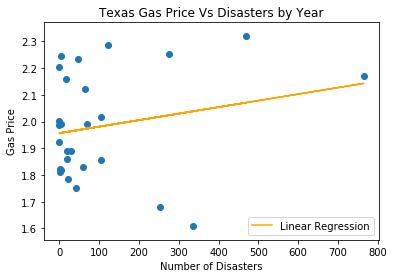

In [63]:
plt.scatter(temp["TX"],top5["TX"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price")
tx1,tx2=linear_reg(temp["TX"],top5["TX"])
plt.plot(temp["TX"],tx1(temp["TX"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Texas Gas Price Vs Disasters by Year")
plt.savefig("Texas_graph.png")

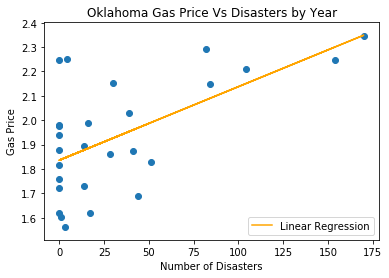

In [64]:
plt.scatter(temp["OK"],top5["OK"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price")
tx1,tx2=linear_reg(temp["OK"],top5["OK"])
plt.plot(temp["OK"],tx1(temp["OK"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Oklahoma Gas Price Vs Disasters by Year")
plt.savefig("Oklahoma_graph.png")

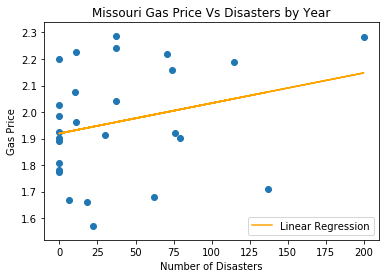

In [65]:
plt.scatter(temp["MO"],top5["MO"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price")
tx1,tx2=linear_reg(temp["MO"],top5["MO"])
plt.plot(temp["MO"],tx1(temp["MO"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Missouri Gas Price Vs Disasters by Year")
plt.savefig("Missouri_graph.png")

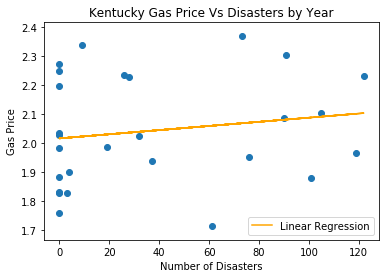

In [66]:
plt.scatter(temp["KY"],top5["KY"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price")
tx1,tx2=linear_reg(temp["KY"],top5["KY"])
plt.plot(temp["KY"],tx1(temp["KY"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Kentucky Gas Price Vs Disasters by Year")
plt.savefig("Kentucky_graph.png")

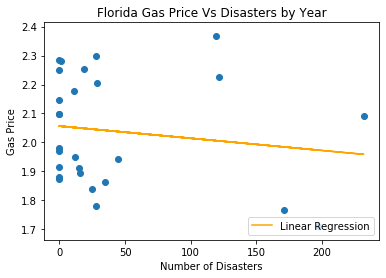

In [67]:
plt.scatter(temp["FL"],top5["FL"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price")
tx1,tx2=linear_reg(temp["FL"],top5["FL"])
plt.plot(temp["FL"],tx1(temp["FL"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Florida Gas Price Vs Disasters by Year")
plt.savefig("Florida_graph.png")

In [62]:
slopes=[]
slope_sum=0
for st in stcodes:
    func,coeff=linear_reg(temp[st],testing[st])
    slopes.append(coeff.tolist()[1])
    slope_sum=slope_sum+coeff.tolist()[1]
avg_slope=slope_sum/50
avg_slope

2.07922788606939